In [89]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [90]:
hot_songs = pd.read_csv('df_top_100.csv')
not_hot_songs = pd.read_csv('df1.csv')

In [91]:
hot_songs.columns

Index(['title', 'artists', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'open_url'],
      dtype='object')

In [92]:
hot_songs.drop('track_id',  axis=1, inplace=True)

In [93]:
not_hot_songs.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'open_url', 'artist_name', 'title'],
      dtype='object')

In [94]:
not_hot_songs.drop('Unnamed: 0',  axis=1, inplace=True)
not_hot_songs.rename(columns={'artist_name': 'artists', 'title': 'title'}, inplace=True)


In [95]:
not_hot_songs = not_hot_songs.reindex(columns=['title', 'artists', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'open_url'])


In [96]:
not_hot_songs.drop('track_id',  axis=1, inplace=True)

In [97]:
not_hot_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url
0,Rock & Roll Renegade,The Frantic,0.820,0.285,0,-16.499,0,0.5020,0.243000,0.000007,...,0.230,95.955,audio_features,46rCJx8YdbP5ZaQyh57fwE,spotify:track:46rCJx8YdbP5ZaQyh57fwE,https://api.spotify.com/v1/tracks/46rCJx8YdbP5...,https://api.spotify.com/v1/audio-analysis/46rC...,172139,4,https://open.spotify.com/track/46rCJx8YdbP5ZaQ...
1,Undertow,Jackson United,0.434,0.726,7,-5.482,0,0.0330,0.035100,0.288000,...,0.700,92.751,audio_features,2Zv95uoSB1H4puVfAYbovF,spotify:track:2Zv95uoSB1H4puVfAYbovF,https://api.spotify.com/v1/tracks/2Zv95uoSB1H4...,https://api.spotify.com/v1/audio-analysis/2Zv9...,203560,4,https://open.spotify.com/track/2Zv95uoSB1H4puV...
2,Nothing To Hold Me,Jesus Jones,0.558,0.750,7,-14.226,1,0.0538,0.003160,0.000466,...,0.510,165.601,audio_features,2nRN3JGw8ol8M4V02qqMQ5,spotify:track:2nRN3JGw8ol8M4V02qqMQ5,https://api.spotify.com/v1/tracks/2nRN3JGw8ol8...,https://api.spotify.com/v1/audio-analysis/2nRN...,201107,4,https://open.spotify.com/track/2nRN3JGw8ol8M4V...
3,Clementina Santaf\xc3\xa8,Gloriana,0.645,0.683,11,-8.036,0,0.0536,0.423000,0.000000,...,0.742,93.470,audio_features,3XjTiKuAorW6CUmKaSZEvD,spotify:track:3XjTiKuAorW6CUmKaSZEvD,https://api.spotify.com/v1/tracks/3XjTiKuAorW6...,https://api.spotify.com/v1/audio-analysis/3XjT...,114933,4,https://open.spotify.com/track/3XjTiKuAorW6CUm...
4,One of Us,Bottom Of The Hudson,0.391,0.265,11,-11.686,1,0.0418,0.939000,0.000005,...,0.176,78.000,audio_features,6kMS4r4z30mtNxUwARDvbP,spotify:track:6kMS4r4z30mtNxUwARDvbP,https://api.spotify.com/v1/tracks/6kMS4r4z30mt...,https://api.spotify.com/v1/audio-analysis/6kMS...,247118,4,https://open.spotify.com/track/6kMS4r4z30mtNxU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,Skank and Dub,Junior Reid,0.969,0.870,9,-4.805,1,0.1230,0.004160,0.005930,...,0.567,130.054,audio_features,1Ks2UH3WvpohH9q8b03NM7,spotify:track:1Ks2UH3WvpohH9q8b03NM7,https://api.spotify.com/v1/tracks/1Ks2UH3Wvpoh...,https://api.spotify.com/v1/audio-analysis/1Ks2...,200742,4,https://open.spotify.com/track/1Ks2UH3WvpohH9q...
2982,I Guess I'm Crazy,Jim Reeves,0.497,0.261,4,-13.869,1,0.0273,0.761000,0.000291,...,0.616,93.636,audio_features,4GPbOUUbitW3e6aEVccrhf,spotify:track:4GPbOUUbitW3e6aEVccrhf,https://api.spotify.com/v1/tracks/4GPbOUUbitW3...,https://api.spotify.com/v1/audio-analysis/4GPb...,142153,3,https://open.spotify.com/track/4GPbOUUbitW3e6a...
2983,Stop Breaking Down (1994 Digital Remaster),The Rolling Stones,0.522,0.891,9,-4.085,1,0.0322,0.509000,0.908000,...,0.910,104.411,audio_features,09eg3FGzsZQbZk8qEXhJIA,spotify:track:09eg3FGzsZQbZk8qEXhJIA,https://api.spotify.com/v1/tracks/09eg3FGzsZQb...,https://api.spotify.com/v1/audio-analysis/09eg...,274773,4,https://open.spotify.com/track/09eg3FGzsZQbZk8...
2984,Albo,Hevia,0.594,0.284,0,-16.440,0,0.0309,0.438000,0.876000,...,0.051,81.983,audio_features,2lAzmBq6991fuq3DbcL2hN,spotify:track:2lAzmBq6991fuq3DbcL2hN,https://api.spotify.com/v1/tracks/2lAzmBq6991f...,https://api.spotify.com/v1/audio-analysis/2lAz...,140671,4,https://open.spotify.com/track/2lAzmBq6991fuq3...


In [98]:
hot_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url
0,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,0.05430,0.169000,...,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,https://open.spotify.com/track/3OHfY25tqY28d16...
1,Last Night,Morgan Wallen,0.502,0.667,6,-5.486,1,0.0342,0.44500,0.000000,...,0.545,203.964,audio_features,6Hiz5MDYoGdLBBQ3gGzRam,spotify:track:6Hiz5MDYoGdLBBQ3gGzRam,https://api.spotify.com/v1/tracks/6Hiz5MDYoGdL...,https://api.spotify.com/v1/audio-analysis/6Hiz...,163855,4,https://open.spotify.com/track/6Hiz5MDYoGdLBBQ...
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,...,0.646,117.999,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.14000,0.000000,...,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.48300,0.000019,...,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Memory Lane,Old Dominion,0.645,0.800,6,-4.272,1,0.0363,0.01890,0.000011,...,0.375,118.977,audio_features,5kB6WithhB8Iv08EMNmAbt,spotify:track:5kB6WithhB8Iv08EMNmAbt,https://api.spotify.com/v1/tracks/5kB6WithhB8I...,https://api.spotify.com/v1/audio-analysis/5kB6...,172480,4,https://open.spotify.com/track/5kB6WithhB8Iv08...
96,Love Again,The Kid LAROI,0.662,0.398,11,-6.691,0,0.0275,0.71600,0.000000,...,0.468,107.001,audio_features,4sx6NRwL6Ol3V6m9exwGlQ,spotify:track:4sx6NRwL6Ol3V6m9exwGlQ,https://api.spotify.com/v1/tracks/4sx6NRwL6Ol3...,https://api.spotify.com/v1/audio-analysis/4sx6...,145850,4,https://open.spotify.com/track/4sx6NRwL6Ol3V6m...
97,'98 Braves,Morgan Wallen,0.486,0.677,2,-5.805,1,0.0264,0.08170,0.000110,...,0.502,142.102,audio_features,5hBfhQrgxSehQUqU7jX13q,spotify:track:5hBfhQrgxSehQUqU7jX13q,https://api.spotify.com/v1/tracks/5hBfhQrgxSeh...,https://api.spotify.com/v1/audio-analysis/5hBf...,178704,4,https://open.spotify.com/track/5hBfhQrgxSehQUq...
98,Di Que Si,Grupo Marca Registrada X Grupo Frontera,0.570,0.589,9,-5.378,1,0.0488,0.07530,0.000000,...,0.796,182.318,audio_features,0kzN7YAMSbmlHOvxlbQW9y,spotify:track:0kzN7YAMSbmlHOvxlbQW9y,https://api.spotify.com/v1/tracks/0kzN7YAMSbml...,https://api.spotify.com/v1/audio-analysis/0kzN...,190554,4,https://open.spotify.com/track/0kzN7YAMSbmlHOv...


In [99]:
display(hot_songs.shape)
display(not_hot_songs.shape)

(100, 21)

(2986, 21)

In [100]:
import pickle

In [101]:
# Concatenate the two dataframes together
songs = pd.concat([hot_songs, not_hot_songs], axis=0)

# Add a new column to the songs dataframe to identify which dataset each song belongs to
songs["dataset"] = np.where(songs.index < hot_songs.shape[0], "hot_songs", "not_hot_songs")

# Select the audio features that we will use for clustering
audio_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key"]

# Standardize the audio features
scaler = StandardScaler()
songs_scaled = scaler.fit_transform(songs[audio_features])
filename = "scaler.pickle"

with open(filename, "wb") as file: 
        pickle.dump(scaler,file)

songs_scaled_df = pd.DataFrame(songs_scaled, columns = audio_features)
songs_scaled_df.head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key
0,0.404837,0.602324,0.690041,-0.490267,-0.876399,-0.023493,-0.169004,-0.322192,-0.982716,0.757987
1,-0.393228,0.367016,0.735043,-0.498715,0.250349,-0.539869,-0.275048,0.111263,2.795988,0.192292
2,0.758908,0.421021,0.932947,-0.192737,-0.850732,-0.539854,-0.972448,0.491950,-0.029388,-1.504793
3,1.832362,0.401734,0.784476,0.935438,-0.629247,-0.539869,-0.543279,0.853791,0.956347,1.040835
4,0.539721,0.718049,0.787885,-0.508101,0.359938,-0.539812,-0.651195,1.200555,0.956281,-0.090555


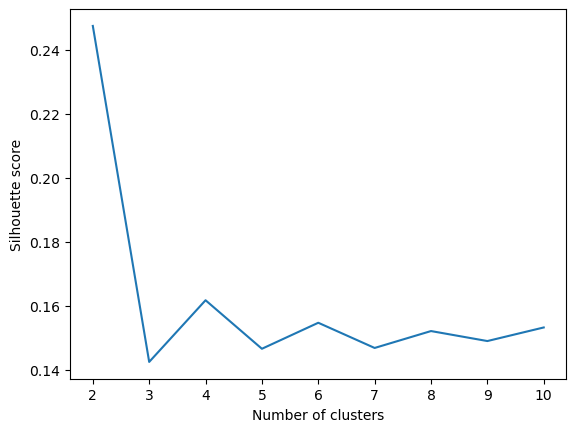

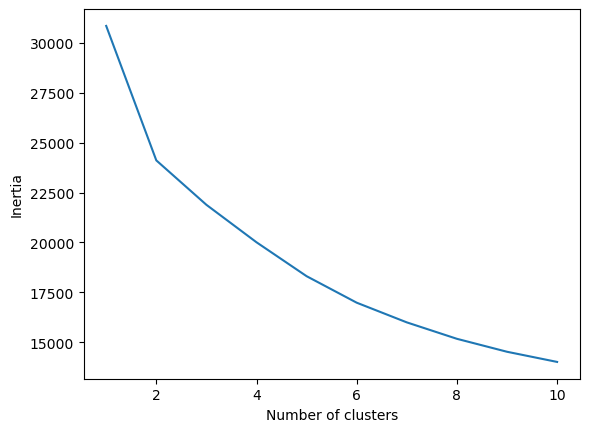

In [102]:
# Determine the optimal number of clusters
# We can use the elbow method to do this
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(songs_scaled)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(songs_scaled)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(songs_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

    

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# From the silhouette plot, it looks like 5 and 7 clusters is a good number

# Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1234).fit(songs_scaled)


In [103]:
# Train the K-Means model with 7 clusters
kmeans2 = KMeans(n_clusters=7, random_state=1234).fit(songs_scaled)

In [104]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [105]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [106]:
best_model = load("kmeans_5.pickle")

In [107]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(songs_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [108]:
clusters = kmeans.predict(songs_scaled_df)
pd.Series(clusters).value_counts().sort_index() 

0     303
1    1029
2     673
3     283
4     798
dtype: int64

In [109]:
best_model2 = load("kmeans_7.pickle")

In [110]:
kmeans2 = KMeans(n_clusters=7, random_state=1234)
kmeans2.fit(songs_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [111]:
clusters2 = kmeans2.predict(songs_scaled_df)
pd.Series(clusters2).value_counts().sort_index() 

0    309
1    170
2    632
3    249
4    554
5    627
6    545
dtype: int64

In [112]:
songs["cluster2"] = clusters2
songs.head()

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2
0,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,https://open.spotify.com/track/3OHfY25tqY28d16...,hot_songs,5
1,Last Night,Morgan Wallen,0.502,0.667,6,-5.486,1,0.0342,0.4450,0.000000,...,audio_features,6Hiz5MDYoGdLBBQ3gGzRam,spotify:track:6Hiz5MDYoGdLBBQ3gGzRam,https://api.spotify.com/v1/tracks/6Hiz5MDYoGdL...,https://api.spotify.com/v1/audio-analysis/6Hiz...,163855,4,https://open.spotify.com/track/6Hiz5MDYoGdLBBQ...,hot_songs,4
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,...,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,2
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,...,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,5
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,...,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,5


In [113]:
songs.to_csv("songs_clustered.csv", index=False)

In [115]:
songs["cluster"] = clusters
songs.head()

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
0,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,...,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,https://open.spotify.com/track/3OHfY25tqY28d16...,hot_songs,5,1
1,Last Night,Morgan Wallen,0.502,0.667,6,-5.486,1,0.0342,0.4450,0.000000,...,6Hiz5MDYoGdLBBQ3gGzRam,spotify:track:6Hiz5MDYoGdLBBQ3gGzRam,https://api.spotify.com/v1/tracks/6Hiz5MDYoGdL...,https://api.spotify.com/v1/audio-analysis/6Hiz...,163855,4,https://open.spotify.com/track/6Hiz5MDYoGdLBBQ...,hot_songs,4,4
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,...,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,2,1
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,...,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,5,1
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,...,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,5,1


In [116]:
pd.concat([group.sample(1) for _, group in songs.groupby("cluster")])

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
1608,Bed's Too Big Without You,Inner Circle,0.551,0.128,2,-16.382,1,0.0316,0.9270,0.937000,...,41ial1TTDNlhaEuzpI5SAk,spotify:track:41ial1TTDNlhaEuzpI5SAk,https://api.spotify.com/v1/tracks/41ial1TTDNlh...,https://api.spotify.com/v1/audio-analysis/41ia...,184231,4,https://open.spotify.com/track/41ial1TTDNlhaEu...,not_hot_songs,0,0
1910,Dixie,Hank Penny & The Lincoln Penny Orchestra,0.724,0.748,5,-7.224,1,0.0498,0.7360,0.000000,...,7IvUQIQpP2xM93Ym6w7s5d,spotify:track:7IvUQIQpP2xM93Ym6w7s5d,https://api.spotify.com/v1/tracks/7IvUQIQpP2xM...,https://api.spotify.com/v1/audio-analysis/7IvU...,141240,4,https://open.spotify.com/track/7IvUQIQpP2xM93Y...,not_hot_songs,5,1
2589,Dark End Of The Street,Diamanda Galas,0.522,0.397,7,-8.491,1,0.0270,0.7990,0.038000,...,5vWMCGVeGxp3PEdvpDN3a0,spotify:track:5vWMCGVeGxp3PEdvpDN3a0,https://api.spotify.com/v1/tracks/5vWMCGVeGxp3...,https://api.spotify.com/v1/audio-analysis/5vWM...,153987,4,https://open.spotify.com/track/5vWMCGVeGxp3PEd...,not_hot_songs,6,2
770,Hart(z) IV,Eko Fresh,0.756,0.896,4,-6.270,0,0.3430,0.0886,0.000000,...,2Eze2Yon4PQRtDehACJaN1,spotify:track:2Eze2Yon4PQRtDehACJaN1,https://api.spotify.com/v1/tracks/2Eze2Yon4PQR...,https://api.spotify.com/v1/audio-analysis/2Eze...,206897,4,https://open.spotify.com/track/2Eze2Yon4PQRtDe...,not_hot_songs,3,3
940,Night is the Notion,Dax Riggs,0.417,0.697,8,-5.867,1,0.0305,0.0627,0.000028,...,7aoPlENlVAQm9C78Q1lv7N,spotify:track:7aoPlENlVAQm9C78Q1lv7N,https://api.spotify.com/v1/tracks/7aoPlENlVAQm...,https://api.spotify.com/v1/audio-analysis/7aoP...,158680,4,https://open.spotify.com/track/7aoPlENlVAQm9C7...,not_hot_songs,4,4


In [117]:
pd.concat([group.sample(1) for _, group in songs.groupby("cluster2")])

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
2455,Swan Lake,Brazilian Tropical Orchestra,0.160,0.156,4,-21.678,0,0.0412,0.9490,0.916000,...,4vSdYf8zbPXtxKU1U0KnPj,spotify:track:4vSdYf8zbPXtxKU1U0KnPj,https://api.spotify.com/v1/tracks/4vSdYf8zbPXt...,https://api.spotify.com/v1/audio-analysis/4vSd...,136973,3,https://open.spotify.com/track/4vSdYf8zbPXtxKU...,not_hot_songs,0,0
1347,When The Moon Comes Up Wild,Tijuana Hercules,0.635,0.584,0,-7.912,1,0.1440,0.5200,0.095100,...,3Jq9rsqmRtqcVKtzP9dnxZ,spotify:track:3Jq9rsqmRtqcVKtzP9dnxZ,https://api.spotify.com/v1/tracks/3Jq9rsqmRtqc...,https://api.spotify.com/v1/audio-analysis/3Jq9...,266733,4,https://open.spotify.com/track/3Jq9rsqmRtqcVKt...,not_hot_songs,1,4
1937,Rock Me Baby,Freddie King,0.565,0.526,0,-11.352,1,0.0365,0.0339,0.000119,...,2wnjZXcAT3rCjjqxLeHjv7,spotify:track:2wnjZXcAT3rCjjqxLeHjv7,https://api.spotify.com/v1/tracks/2wnjZXcAT3rC...,https://api.spotify.com/v1/audio-analysis/2wnj...,204333,4,https://open.spotify.com/track/2wnjZXcAT3rCjjq...,not_hot_songs,2,1
30,Slut Me Out,NLE Choppa,0.938,0.606,6,-6.396,0,0.4190,0.1170,0.000000,...,5BmB3OaQyYXCqRyN8iR2Yi,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,https://api.spotify.com/v1/tracks/5BmB3OaQyYXC...,https://api.spotify.com/v1/audio-analysis/5BmB...,123673,4,https://open.spotify.com/track/5BmB3OaQyYXCqRy...,hot_songs,3,3
2335,Let Me Be Your Fantasy,Baby D,0.644,0.790,4,-11.026,0,0.0343,0.0401,0.002330,...,7DSEeWvqViVIZ8ht5PC0uO,spotify:track:7DSEeWvqViVIZ8ht5PC0uO,https://api.spotify.com/v1/tracks/7DSEeWvqViVI...,https://api.spotify.com/v1/audio-analysis/7DSE...,231493,4,https://open.spotify.com/track/7DSEeWvqViVIZ8h...,not_hot_songs,4,4
416,Don't Go Breaking My Heart (LP Version),Sergio Mendes,0.729,0.844,5,-8.824,1,0.0344,0.1490,0.000003,...,7HW5WIw7ZgZORCzUxv5gW5,spotify:track:7HW5WIw7ZgZORCzUxv5gW5,https://api.spotify.com/v1/tracks/7HW5WIw7ZgZO...,https://api.spotify.com/v1/audio-analysis/7HW5...,275440,4,https://open.spotify.com/track/7HW5WIw7ZgZORCz...,not_hot_songs,5,1
27,Thank God,Kane Brown With Katelyn Brown,0.738,0.455,3,-8.735,1,0.0352,0.6950,0.000000,...,1brnLTvarI9D1hLP6z2Ar8,spotify:track:1brnLTvarI9D1hLP6z2Ar8,https://api.spotify.com/v1/tracks/1brnLTvarI9D...,https://api.spotify.com/v1/audio-analysis/1brn...,174560,4,https://open.spotify.com/track/1brnLTvarI9D1hL...,hot_songs,6,2


In [118]:
random_songs = pd.concat([group.sample(1) for _, group in songs.groupby("cluster2")])

In [119]:
random_songs= random_songs.drop('cluster', axis=1)

In [120]:
random_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2
980,Desire,Rockabye Baby!,0.612,0.0943,7,-28.952,1,0.0449,0.995000,0.887000,...,audio_features,5Sz1zHLWn7bAIDhIecQqaz,spotify:track:5Sz1zHLWn7bAIDhIecQqaz,https://api.spotify.com/v1/tracks/5Sz1zHLWn7bA...,https://api.spotify.com/v1/audio-analysis/5Sz1...,154117,3,https://open.spotify.com/track/5Sz1zHLWn7bAIDh...,not_hot_songs,0
2517,Afonsina y el mar,Triana Pura,0.728,0.9060,2,-7.133,0,0.1080,0.701000,0.000026,...,audio_features,4RmVweRIA1Eae1IZ9fdJn2,spotify:track:4RmVweRIA1Eae1IZ9fdJn2,https://api.spotify.com/v1/tracks/4RmVweRIA1Ea...,https://api.spotify.com/v1/audio-analysis/4RmV...,253000,3,https://open.spotify.com/track/4RmVweRIA1Eae1I...,not_hot_songs,1
2695,Night Shift,Ashbrg,0.630,0.7540,2,-3.564,1,0.0284,0.096300,0.000000,...,audio_features,0bPnT6i9H1p8Vd85GS6Z7I,spotify:track:0bPnT6i9H1p8Vd85GS6Z7I,https://api.spotify.com/v1/tracks/0bPnT6i9H1p8...,https://api.spotify.com/v1/audio-analysis/0bPn...,172253,4,https://open.spotify.com/track/0bPnT6i9H1p8Vd8...,not_hot_songs,2
2473,Burlesque burglary,Cool cavemen,0.753,0.7080,7,-5.389,1,0.2650,0.008100,0.000000,...,audio_features,3my8nYpb74vfIPyRPo0zVq,spotify:track:3my8nYpb74vfIPyRPo0zVq,https://api.spotify.com/v1/tracks/3my8nYpb74vf...,https://api.spotify.com/v1/audio-analysis/3my8...,179373,4,https://open.spotify.com/track/3my8nYpb74vfIPy...,not_hot_songs,3
217,Spanish Nights,Michael Stanley Band,0.343,0.4240,7,-11.167,1,0.0327,0.455000,0.000044,...,audio_features,2FQVa38PhKUNgLa6LSLtdO,spotify:track:2FQVa38PhKUNgLa6LSLtdO,https://api.spotify.com/v1/tracks/2FQVa38PhKUN...,https://api.spotify.com/v1/audio-analysis/2FQV...,344000,4,https://open.spotify.com/track/2FQVa38PhKUNgLa...,not_hot_songs,4
1272,Zavelow House (Album Version),Owsley,0.576,0.9390,9,-4.291,1,0.0588,0.000578,0.000181,...,audio_features,2Vu4qskGk46IVOkR67g9wi,spotify:track:2Vu4qskGk46IVOkR67g9wi,https://api.spotify.com/v1/tracks/2Vu4qskGk46I...,https://api.spotify.com/v1/audio-analysis/2Vu4...,221773,4,https://open.spotify.com/track/2Vu4qskGk46IVOk...,not_hot_songs,5
1999,Beneath The Valley Of The Underdog (Album Vers...,Mudhoney,0.240,0.0445,11,-7.558,1,0.0547,0.082100,0.000647,...,audio_features,6wpyVKdfTfr4KgYWITddpD,spotify:track:6wpyVKdfTfr4KgYWITddpD,https://api.spotify.com/v1/tracks/6wpyVKdfTfr4...,https://api.spotify.com/v1/audio-analysis/6wpy...,519747,4,https://open.spotify.com/track/6wpyVKdfTfr4KgY...,not_hot_songs,6


In [121]:
random_songs.to_csv("random_songs.csv", index=False)

In [122]:
#cluster2 is the best option with 7 clusters

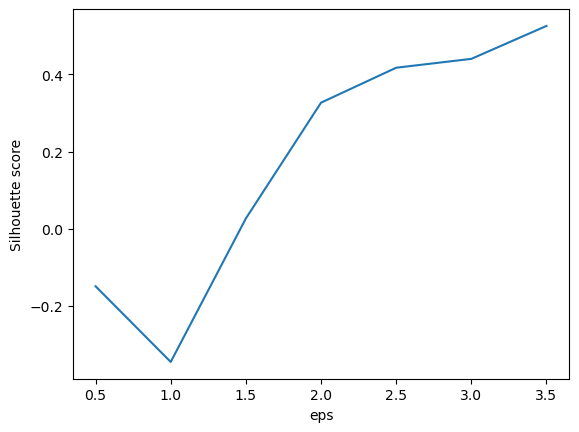

In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



# Concatenate the two dataframes together
songs1 = pd.concat([hot_songs, not_hot_songs], axis=0)

# Add a new column to the songs dataframe to identify which dataset each song belongs to
songs1["dataset"] = np.where(songs1.index < hot_songs.shape[0], "hot_songs", "not_hot_songs")

# Select the audio features that we will use for clustering
audio_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key"]

# Standardize the audio features
scaler = StandardScaler()
songs_scaled = scaler.fit_transform(songs1[audio_features])
filename = "scaler.pickle"

with open(filename, "wb") as file: 
        pickle.dump(scaler,file)

songs_scaled_df = pd.DataFrame(songs_scaled, columns = audio_features)
songs_scaled_df.head()

# Determine the optimal value of eps
# We can use the silhouette score to do this
silhouette_scores = []
eps_range = np.linspace(0.5, 5, num=10)
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(songs_scaled)
    filename = "dbscan_" + str(eps) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(dbscan,file)
    labels = dbscan.labels_
    if len(set(labels)) > 1:
        silhouette_scores.append(silhouette_score(songs_scaled, labels))

plt.plot(eps_range[:len(silhouette_scores)], silhouette_scores)
plt.xlabel("eps")
plt.ylabel("Silhouette score")
plt.show()

# From the silhouette plot, it looks like eps=3.5 is a good value

# Train the DBSCAN model with eps=3.5
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(songs_scaled)


def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

scaler2 = load("scaler.pickle")
scaler2

best_model = load("dbscan_0.5.pickle")


dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(songs_scaled_df)


clusters = dbscan.labels_
pd.Series(clusters).value_counts().sort_index() 

songs1["dbscan_cluster"] = clusters

songs1.to_csv("songs1_clustered.csv", index=False)

In [124]:
songs1

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,dbscan_cluster
0,Kill Bill,SZA,0.644,0.728,8,-5.750,1,0.0351,0.054300,0.169000,...,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,https://open.spotify.com/track/3OHfY25tqY28d16...,hot_songs,-1
1,Last Night,Morgan Wallen,0.502,0.667,6,-5.486,1,0.0342,0.445000,0.000000,...,audio_features,6Hiz5MDYoGdLBBQ3gGzRam,spotify:track:6Hiz5MDYoGdLBBQ3gGzRam,https://api.spotify.com/v1/tracks/6Hiz5MDYoGdL...,https://api.spotify.com/v1/audio-analysis/6Hiz...,163855,4,https://open.spotify.com/track/6Hiz5MDYoGdLBBQ...,hot_songs,-1
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.063200,0.000005,...,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,-1
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.140000,0.000000,...,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,-1
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.483000,0.000019,...,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,Skank and Dub,Junior Reid,0.969,0.870,9,-4.805,1,0.1230,0.004160,0.005930,...,audio_features,1Ks2UH3WvpohH9q8b03NM7,spotify:track:1Ks2UH3WvpohH9q8b03NM7,https://api.spotify.com/v1/tracks/1Ks2UH3Wvpoh...,https://api.spotify.com/v1/audio-analysis/1Ks2...,200742,4,https://open.spotify.com/track/1Ks2UH3WvpohH9q...,not_hot_songs,-1
2982,I Guess I'm Crazy,Jim Reeves,0.497,0.261,4,-13.869,1,0.0273,0.761000,0.000291,...,audio_features,4GPbOUUbitW3e6aEVccrhf,spotify:track:4GPbOUUbitW3e6aEVccrhf,https://api.spotify.com/v1/tracks/4GPbOUUbitW3...,https://api.spotify.com/v1/audio-analysis/4GPb...,142153,3,https://open.spotify.com/track/4GPbOUUbitW3e6a...,not_hot_songs,-1
2983,Stop Breaking Down (1994 Digital Remaster),The Rolling Stones,0.522,0.891,9,-4.085,1,0.0322,0.509000,0.908000,...,audio_features,09eg3FGzsZQbZk8qEXhJIA,spotify:track:09eg3FGzsZQbZk8qEXhJIA,https://api.spotify.com/v1/tracks/09eg3FGzsZQb...,https://api.spotify.com/v1/audio-analysis/09eg...,274773,4,https://open.spotify.com/track/09eg3FGzsZQbZk8...,not_hot_songs,-1
2984,Albo,Hevia,0.594,0.284,0,-16.440,0,0.0309,0.438000,0.876000,...,audio_features,2lAzmBq6991fuq3DbcL2hN,spotify:track:2lAzmBq6991fuq3DbcL2hN,https://api.spotify.com/v1/tracks/2lAzmBq6991f...,https://api.spotify.com/v1/audio-analysis/2lAz...,140671,4,https://open.spotify.com/track/2lAzmBq6991fuq3...,not_hot_songs,-1


In [125]:
cluster_counts = songs1['dbscan_cluster'].value_counts()
print(cluster_counts)


-1     3005
 6        5
 21       4
 19       4
 10       4
 14       4
 13       3
 23       3
 22       3
 20       3
 18       3
 17       3
 16       3
 15       3
 12       3
 0        3
 11       3
 9        3
 8        3
 7        3
 5        3
 4        3
 3        3
 2        3
 1        3
 24       3
Name: dbscan_cluster, dtype: int64


In [126]:
#We will use Kmeans with 7 clusters